# Social Networking Apps/Sites Usage of Filipinos During Enhanced Community Quarantine (ECQ)

An Unofficial Online Survey conducted during the implementation of Enhanced Community Quarantine (ECQ) in the Philippines as part of my Capstone Project on my Data Engineering course at Project SPARTA (Smarter Philippines through Data Analytics R&D, Training and Adoption).
 
## Background of Study

As of January 2020, the world’s internet users will spend a cumulative 1.25 billion years online with more than one-third of that time spent using social media. And the Philippines ranked as the highest internet user spending with an average of 9 hours and 45 minutes per day online. But the data was collected before the COVID-19 pandemic crisis and before the implementation of Enhanced Community Quarantine (ECQ) in the Philippines.

### Purpose

The main purpose of my research is to identify the changes and the effect of the implementation of Enhanced Community Quarantine (ECQ) on Social Networking Apps/Site usage amongst Filipinos.

### Contents

1. A demographics of respondents that shows:
    - Age
    - Sex
    - Location/Residence (by Region)
    - Civil Status
2. A side-by-side comparison of Social Site usage before and during the implementation of Enhanced Community Quarantine (ECQ) in the Philippines that answers the questions:
    - What social networking apps/sites do you use?
    - Which of the following social networking apps/sites did you spend most of your time?
    - On average, how many hours do you spend using these apps/sites?
    - Why do you use these apps?

### Disclaimer

1. This is a small unofficial survey with 50 respondents from different parts of the Philippines who participated in the online survey conducted during the implementation of Enhanced Community Quarantine (ECQ).
2. The survey conducted did not follow any statistical principles and solutions.
3. Please bear in mind that this is an experimental project that I do to enhance my skills in Data Engineering.

### Importing of Data from a CSV file

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/survey_data.csv')

### Demographics of the Respondents

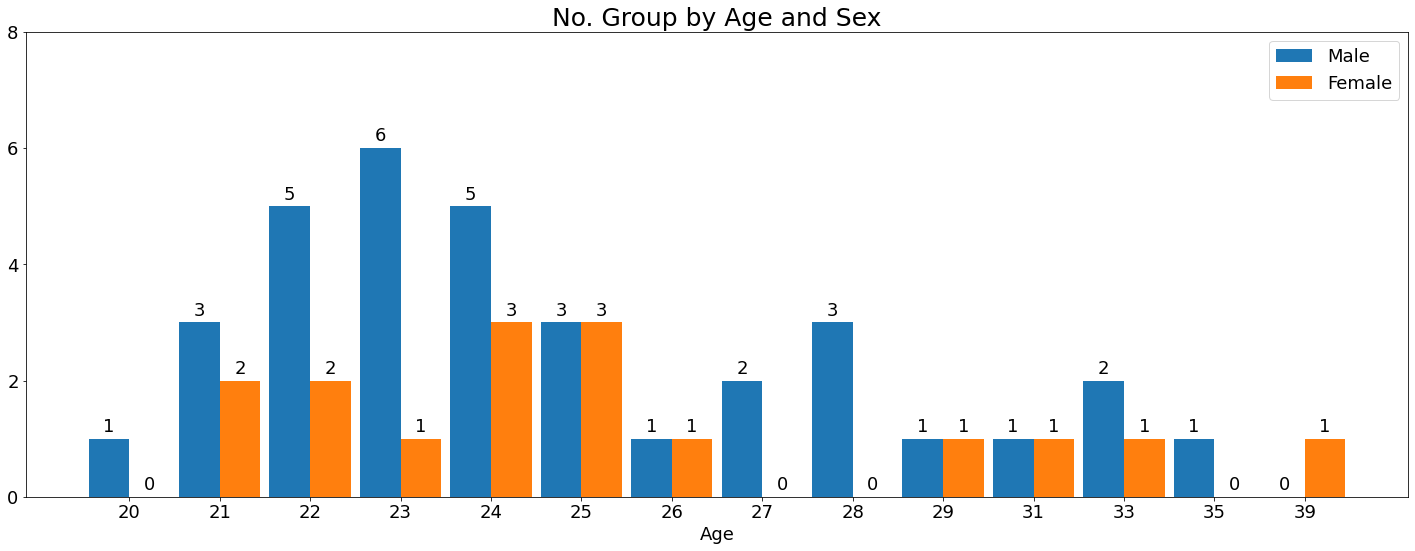

In [225]:
sex_age = create_dict(df.age, df.sex)
labels = sex_age.keys()
sizes1 = [sex_age[s]['Male'] for s in labels]
sizes2 = [sex_age[s]['Female'] for s in labels]

create_group_bar('No. Group by Age and Sex', 
                 sizes1, sizes2, labels, 'Age', ['Male', 'Female'])

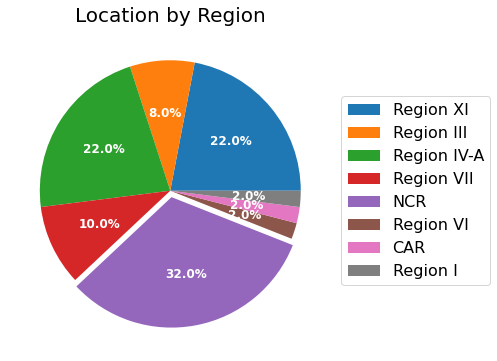

In [23]:
labels = unique_data(df.location)
sizes = count_if_labels(df.location, labels)

create_pie("Location by Region", sizes, labels)

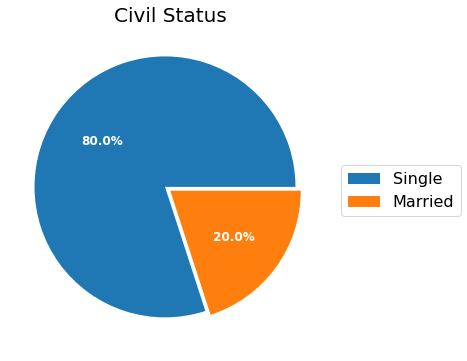

In [22]:
labels = unique_data(df.civil_status)
sizes = count_if_labels(df.civil_status, labels)

create_pie("Civil Status", sizes, labels)

### A Side-by-side comparison of Social Site usage before and during the implementation of Enhanced Community Quarantine (ECQ) in the Philippines that answers the following questions:

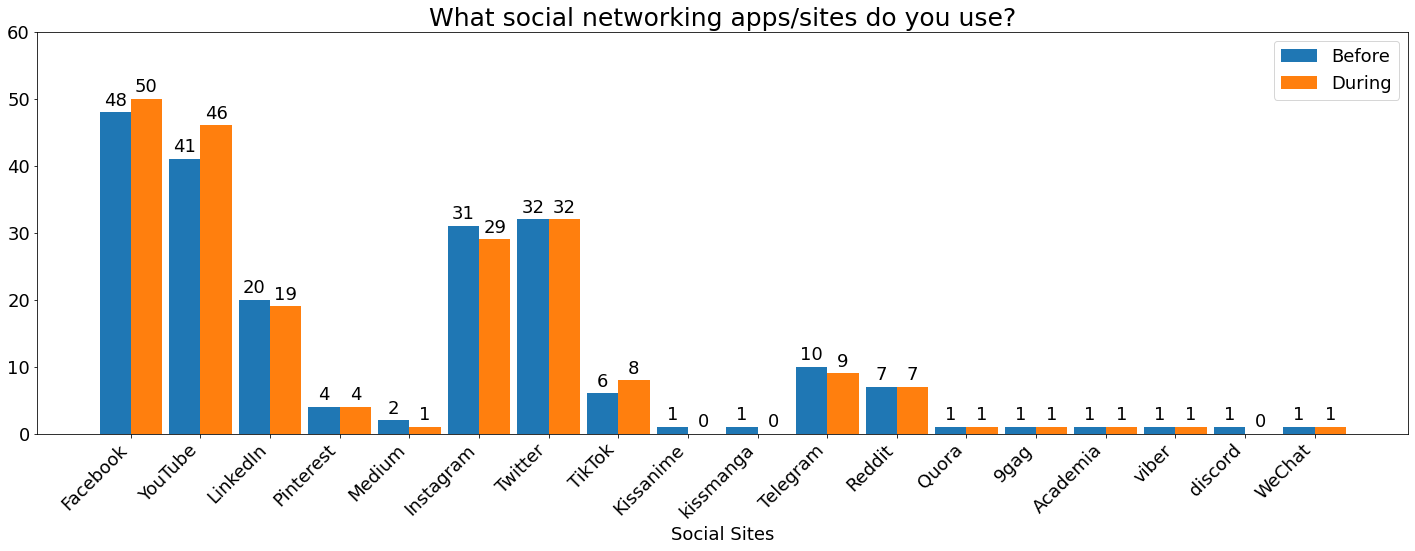

In [224]:
becq_apps_use = split_and_series(df.becq_apps_use, ';')
decq_apps_use = split_and_series(df.decq_apps_use, ';')

labels = unique_data(pd.concat([becq_apps_use, decq_apps_use]))
sizes1 = count_if_labels(becq_apps_use, labels)
sizes2 = count_if_labels(decq_apps_use, labels)

create_group_bar('What social networking apps/sites do you use?', 
                 sizes1, sizes2, labels, 'Social Sites', ['Before', 'During'], rotate=True)

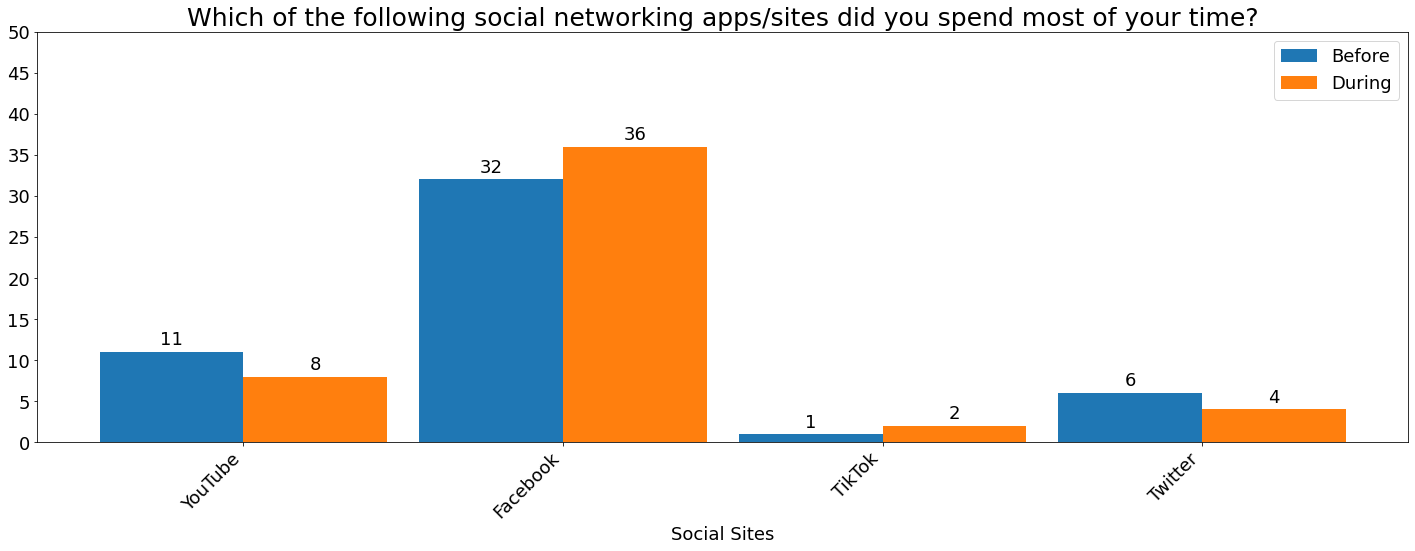

In [223]:
becq_most_use = split_and_series(df.becq_most_use, ';')
decq_most_use = split_and_series(df.decq_most_use, ';')

labels = unique_data(pd.concat([becq_most_use, decq_most_use]))
sizes1 = count_if_labels(becq_most_use, labels)
sizes2 = count_if_labels(decq_most_use, labels)

create_group_bar('Which of the following social networking apps/sites did you spend most of your time?', 
                 sizes1, sizes2, labels, 'Social Sites', ['Before', 'During'], rotate=True)

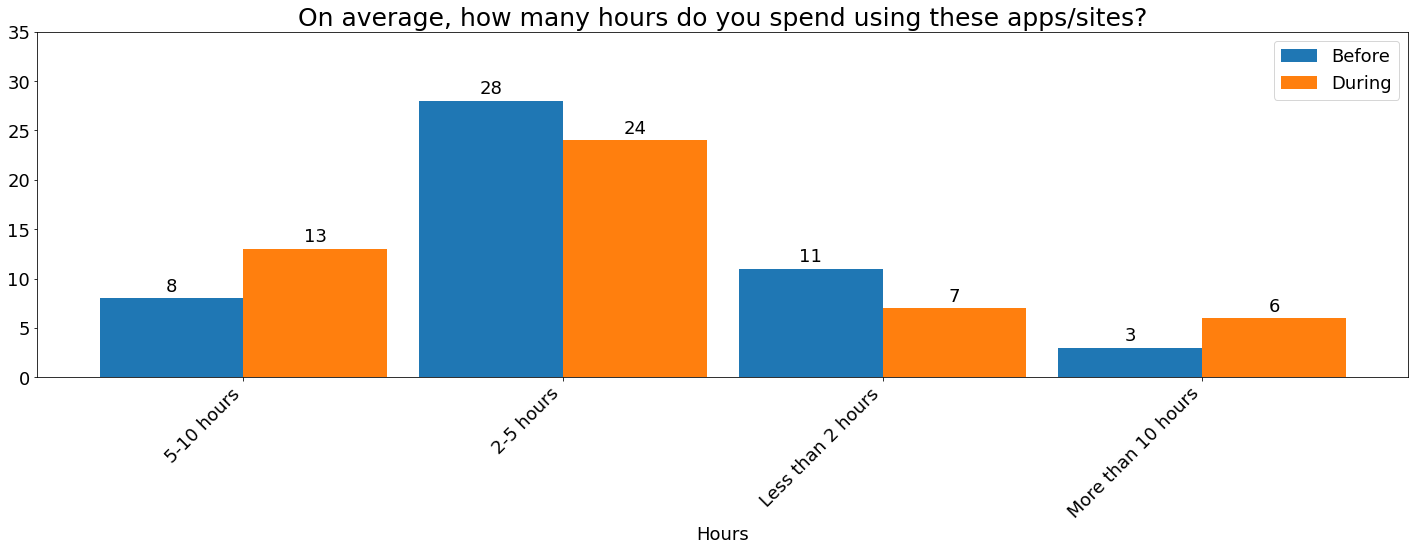

In [222]:
becq_hours_spend = split_and_series(df.becq_hours_spend, ';')
decq_hours_spend = split_and_series(df.decq_hours_spend, ';')

labels = unique_data(pd.concat([becq_hours_spend, decq_hours_spend]))
sizes1 = count_if_labels(becq_hours_spend, labels)
sizes2 = count_if_labels(decq_hours_spend, labels)

create_group_bar('On average, how many hours do you spend using these apps/sites?', 
                 sizes1, sizes2, labels, 'Hours', ['Before', 'During'], rotate=True)

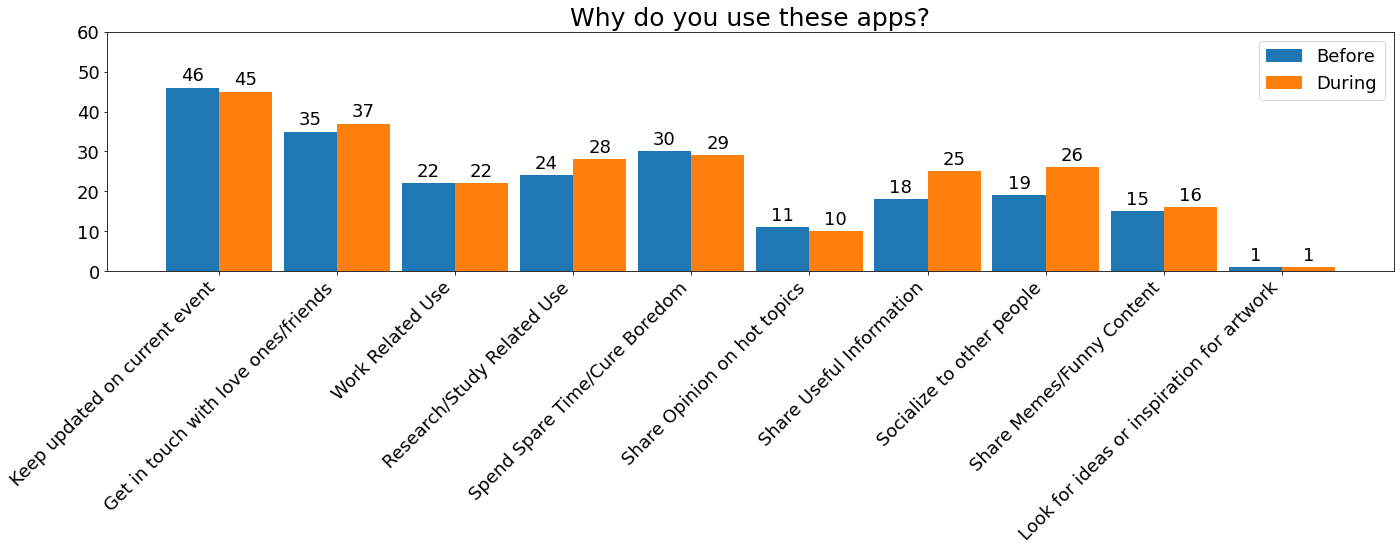

In [221]:
becq_why_use = split_and_series(df.becq_why_use, ';')
decq_why_use = split_and_series(df.decq_why_use, ';')

labels = unique_data(pd.concat([becq_why_use, decq_why_use]))
sizes1 = count_if_labels(becq_why_use, labels)
sizes2 = count_if_labels(decq_why_use, labels)

create_group_bar('Why do you use these apps?', 
                 sizes1, sizes2, labels, '', ['Before', 'During'], rotate=True)

## List of Functions created for this notebook

### Count, Create and Filter

`count_if(array, condition)`, returns a count if the condition is met, works like countif() in excel. <br/>
`count_if_labels(array, labels)` returns an array of count, if the labels are the same. <br/>
`create_dict(key, subkey)` creates a new dictionary. <br/>
`unique_data(array)` retuns an array of unique data.

In [9]:
def count_if(array, condition):
    return (array == condition).sum()

def count_if_labels(array, labels):
    count = []
    for i in range(len(labels)):
        count.append(count_if(array, labels[i]))
    return count

def create_dict(key, subkey):
    u_key = np.sort(unique_data(key))
    u_subkey = unique_data(subkey)
    newDict = {}
    #create empty dict
    for k in u_key:
        newDict[k] = {}
        for s in u_subkey:
            newDict[k][s] = 0
    #populate dict
    for d in range(len(df)):
        newDict[key[d]][subkey[d]] += 1
    return newDict
    
def unique_data(array):
    data = []
    for i in array:
        if(i not in data):
            data.append(i)
    return data

def split_and_series(array, delimiter):
    newArray = []
    for i in array:
        j = i.split(delimiter)
        for k in j:
            newArray.append(k)
    return pd.Series(newArray)

### Create Pie Chart 
`create_pie(title, data, labels)`, creates a pie chart for data visualization.
- `title`: The title of the figure (eg. Figure 1)
- `data` : An array of data that will be represented (eg. [25,25,50])
- `labels`: An array of labels that the data is representing (eg. ["a","b","c"])

In [49]:
def create_pie(title, data, labels):
    fig, ax = plt.subplots(figsize=(12,6), subplot_kw=dict(aspect='equal'))
    explode = ()
    xMax = max(data)
    for i in data:
        explode += (0.05,) if i == xMax else (0,)
    
    wedges, texts, autotexts = ax.pie(data, explode=explode, autopct= '%1.1f%%', textprops=dict(color='w'))

    ax.legend(wedges, labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), 
              fontsize=16, title_fontsize=16)

    plt.setp(autotexts, size=12, weight='bold')

    ax.set_title(title, fontsize=20)

    plt.show()

### Create Bar Graph
`create_group_bar(title, data1, data2 labels, xylabel, legend)`, creates a group bar chart for data visualization.
- `title`: The title of the figure (eg. Figure 1)
- `data1` and `data2` : An array of data that will be represented (eg. [25,25,50])
- `labels`: An array of labels that the data is representing (eg. ["a","b","c"])
- `xlabel`: A string for x-axis label of the graph (eg. "Age")
- `legend`: An array for keys or entries on the plotted area of the graph. (eg. ["Male", "Female"])

In [220]:
def create_group_bar(title, data1, data2, labels, xlabel, legend, rotate = False):
    width = 0.45
    x = np.arange(len(labels))
    yMax = max(data1) if max(data1) >= max(data2) else max(data2)
    base = 5 if round((yMax * 0.2) / 5) != 0 else 2;
    
    
    fig, ax = plt.subplots(figsize=(20, 8))
    rects1 = ax.bar(x - width/2, data1, width)
    rects2 = ax.bar(x + width/2, data2,  width)
    
    ax.set_title(title, fontsize=25)
    ax.set_yticks(np.arange(0,yMax + (yMax * 0.4), (base * round((yMax * 0.2) / base))))
    ax.set_xticks(x)
    ax.set_xlabel(xlabel)
    ax.legend(legend)
    
    if rotate: 
        ax.set_xticklabels(labels, rotation=45, ha='right')
    else:
        ax.set_xticklabels(labels)
    
    autolabel(rects1, ax)
    autolabel(rects2, ax)
        
    plt.rcParams.update({'font.size': 18})
    fig.tight_layout()

    plt.show()
    
# bar graph autolabel
def autolabel(rects, axes):
    for rect in rects:
        height = rect.get_height()
        axes.annotate('{}'.format(height),
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0,3), 
                     textcoords='offset points',
                     ha='center',
                     va='bottom')

## License

- The code for this repo is under MIT License
- The data is under CC BY-NC-SA 4.0 International License